In [1]:
import pandas as pd #imported pandas for the dataframe and data manipulation
from matplotlib import pyplot as plt # installed matplotlib for the graphical repersentation and data visualisation 
import seaborn as s # for creating a heat map for pridicted data presentation 

In [3]:
df = pd.read_csv("Fraud.csv") # imported csv file and converted it in dataframe using pandas

In [4]:
df.head() #printed heads to view the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [23]:
df3=df[['type','amount','oldbalanceOrg','newbalanceOrig','isFraud']] # Utilised 'type','amount','oldbalanceOrg','newbalanceOrig','isFraud' in another dataframe

fraud_counts = df3[df3['isFraud'] == 1]['type'].value_counts() #to get the trasperency of data 
plt.figure(figsize=(8,5))
plt.title('Types of Fraudulent Transactions')
plt.xlabel('Transaction Type')
plt.ylabel('Number of Frauds')
plt.bar(fraud_counts.index, fraud_counts.values) # visual represntation of the type data with respect to frauds
plt.show()


In [29]:
fraud_counts # getting value of fraud_counts

type
CASH_OUT    4116
TRANSFER    4097
Name: count, dtype: int64

In [31]:
df_sort= sorted(df3['type'].unique()) # sorting the values of 'type' column by grouping it with unique value to see the group of data it is characterised 


In [33]:
df_sort #printing the group of type data

['CASH_IN', 'CASH_OUT', 'DEBIT', 'PAYMENT', 'TRANSFER']

In [35]:
df3['type'], mapping = pd.factorize(df3['type'])
#factorising type column data from string format to int format for further data processing in machine learning model
# 'df3["type"]' now contains integer codes, and 'mapping' holds the mapping from integers back to original category names.


/var/folders/5k/slsrk9d90bg806p4zvyx829m0000gn/T/ipykernel_14332/2977759335.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['type'], mapping = pd.factorize(df3['type'])


In [37]:
df3.head() # to view the values

,type,amount,oldbalanceOrg,newbalanceOrig,isFraud
0,0,9839.64,170136.0,160296.36,0
1,0,1864.28,21249.0,19384.72,0
2,1,181.00,181.0,0.00,1
3,2,181.00,181.0,0.00,1
4,0,11668.14,41554.0,29885.86,0


In [94]:
'''
Reviewing the fraud transactions, this gives a snapshot of cases 
where the transaction type, amount, original balance, and resulting 
balance show the entire balance has been deducted — suggesting fraud.
'''

fraud_type = df3[df3['isFraud'] == 1][['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig']]
fraud_type


,type,amount,oldbalanceOrg,newbalanceOrig
2,1,181.00,181.00,0.0
3,2,181.00,181.00,0.0
251,1,2806.00,2806.00,0.0
252,2,2806.00,2806.00,0.0
680,1,20128.00,20128.00,0.0
...,...,...,...,...
6362615,2,339682.13,339682.13,0.0
6362616,1,6311409.28,6311409.28,0.0
6362617,2,6311409.28,6311409.28,0.0
6362618,1,850002.52,850002.52,0.0


In [96]:
'''
Selected features and target variable for model training where 
'X' contains the independent variables (features) that may contribute to identifying frauds -
'amount', 'oldbalanceOrg', 'newbalanceOrig', and 'type'.
'y' is the dependent variable (target), which is 'isFraud',
indicating whether the transaction is fraudulent (1) or not (0).
'''

X = df3[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'type']]
y = df3['isFraud']


In [55]:
from sklearn.model_selection import train_test_split #Imported the train_test_split function from scikit-learn

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42) # spliting data into training and test data set

In [98]:
'''
imported LogisticRegression from scikit-learn as it is a supervised machine learning algorithm widely used for classification problems.
It is used for binary classification where the output can be one of two possible categories such as Yes/No, True/False or 0/1.
Also imported accuracy_score to calculate the accuracy of model
'''
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score


In [61]:
clf = LogisticRegression(max_iter=10000, random_state=0)
clf.fit(X_train, y_train)
# Created and trained the logistic regression model where max_iter=10000 allows more iterations for convergence during training (useful for large datasets).
# random_state=0: setting a seed to ensure reproducibility of results.



LogisticRegression(max_iter=10000, random_state=0)

In [63]:
acc = accuracy_score(y_test, clf.predict(X_test)) * 100
print(f"Logistic Regression model accuracy: {acc:.2f}%")
# to Calculate and print the accuracy of the logistic regression model


Logistic Regression model accuracy: 99.92%


In [65]:
from sklearn.metrics import confusion_matrix, classification_report
#imported metrics and print the confusion matrix for the model's predictions. it will show how well model is pridicting the value
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
#predicted labels for the test data and printed the confusion matrix to evaluate model's performance

[[1906212     139]
 [   1423    1012]]


In [67]:
print(classification_report(y_test, y_pred, target_names=['Not Fraud', 'Fraud']))
#printed a detailed classification report including precision, recall, and F1-score for both classes.
#recall of 0.42 for the 'Fraud' class means the model correctly identified 42% of actual fraud cases.

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00   1906351
       Fraud       0.88      0.42      0.56      2435

    accuracy                           1.00   1908786
   macro avg       0.94      0.71      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786



In [73]:
y_pred #reviewing y_pred value

array([0, 0, 0, ..., 0, 0, 0])

In [79]:
#Predicted on the full dataset (or test set)
y_pred_full = clf.predict(X)

#Createa a copy of dataframe (df3) to avoid modifying the original
df3_with_flags = df3.copy()

#Added the predicted fraud flags
df3_with_flags['isFlaggedFraud'] = y_pred_full


In [82]:
flagged = df3_with_flags[df3_with_flags['isFlaggedFraud'] == 1]
print(flagged.head()) #Reviewed the flagged values where the 'isFlaggedFraud' value is equal to 1


      type      amount  oldbalanceOrg  newbalanceOrig  isFraud  isFlaggedFraud
969      1  1277212.77     1277212.77            0.00        1               1
970      2  1277212.77     1277212.77            0.00        1               1
1818     1  2317408.88     4165916.16      1848507.28        0               1
3059     1  1096187.24     1096187.24            0.00        1               1
3060     2  1096187.24     1096187.24            0.00        1               1


In [84]:
comparison = df3_with_flags[['isFraud', 'isFlaggedFraud']]
print(comparison.value_counts())
#Displayed the count of each unique combination of 'isFraud' and 'isFlaggedFraud' values to compare actual frauds with flagged ones.


isFraud  isFlaggedFraud
0        0                 6353979
1        0                    4754
         1                    3459
0        1                     428
Name: count, dtype: int64


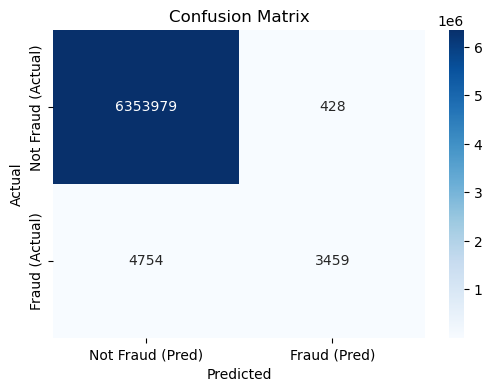

In [86]:
cm = confusion_matrix(df3_with_flags['isFraud'], df3_with_flags['isFlaggedFraud'])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud (Pred)', 'Fraud (Pred)'],
            yticklabels=['Not Fraud (Actual)', 'Fraud (Actual)'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
# Created a confusion matrix to visualize how well 'isFlaggedFraud' matches the actual 'isFraud' labels.
# The heatmap helps identify true positives, false positives, false negatives, and true negatives.
